## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

__무대뽀로 하기 힘들다면? 다음 Hind와 함께 시도해봅시다:__

1. 데이터를 뽑아봅시다.
    - 각 데이터는 어떤 자료형을 가지고 있나요?
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Prob 1

In [20]:
titanic_df = pd.read_csv('./train.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
titanic_df[['Survived', 'Embarked']].groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


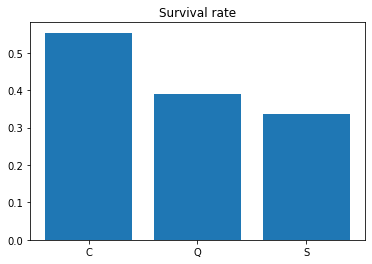

In [66]:
## 특정 항구에서 타고 내림이 생존률과 상관 관계가 있다. (인과관계 x)

a = titanic_df[['Survived', 'Embarked']].groupby(['Embarked']).mean()
plt.bar(x = ['C','Q','S'], height = a['Survived'])
plt.title('Survival rate')

plt.show()

### Prob 2

#### Kaggle에서 too many request issue로 인해서 다운로드가 안되길래 이전에 있던 avocado data로 분석했습니다.

In [74]:
avocado = pd.read_csv('./avocado.csv')

avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [92]:
avocado['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

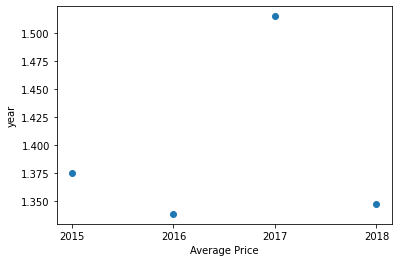

In [104]:
## 원인 모를 이유로 아보카도의 가격은 2017년에 폭등했다.

plt.scatter(np.arange(2015,2019,1),avocado['AveragePrice'].groupby(by = avocado['year']).mean())
plt.xticks(np.arange(2015,2019,1))
plt.xlabel('Average Price')
plt.ylabel('year')
plt.show()